In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from itertools import product

In [ ]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
for i in df:
  print(i,df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

<Axes: >

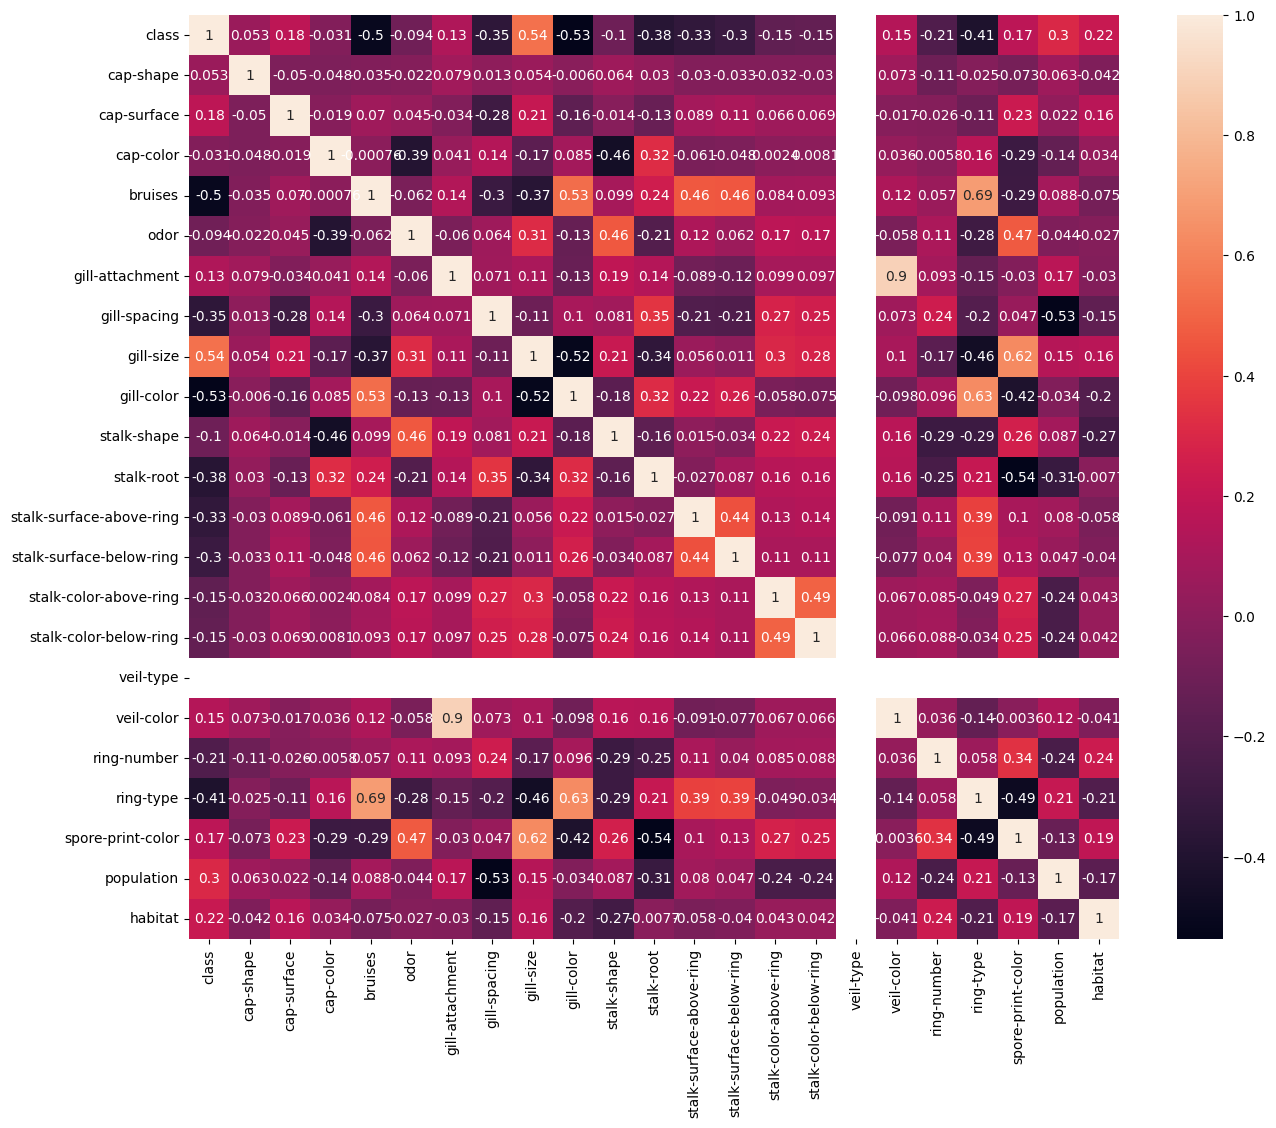

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True)

In [ ]:
target = df['class']
df = df.drop(['class','veil-type'], axis=1)
# df = df.drop(['class','cap-shape','cap-color','odor','veil-type','stalk-shape','gill-attachment'
# ,'cap-surface','stalk-color-above-ring','stalk-color-below-ring','veil-color','spore-print-color'
# ,'habitat','ring-number'], axis=1)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
pca = PCA(n_components=2).fit(data_scaled)
pca_2d = pca.transform(data_scaled)

In [ ]:
def run_dbscan_grid_search(eps_values, min_samples_values, data_scaled):
    for eps, min_samples in product(eps_values, min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)

        # Evaluate using silhouette score
        silhouette = silhouette_score(data_scaled, labels)
        print(f'eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette}')

In [ ]:
eps_values = [0.1,0.2,0.3, 0.4,0.5,0.6,0.7]
min_samples_values = [1,2,3,4,5,6,7,8,9,10]

run_dbscan_grid_search(eps_values, min_samples_values, pca_2d)

eps=0.1, min_samples=1, Silhouette Score: -0.3391502760390093
eps=0.1, min_samples=2, Silhouette Score: -0.33526867906153185
eps=0.1, min_samples=3, Silhouette Score: -0.28930873155181763
eps=0.1, min_samples=4, Silhouette Score: -0.29793704052755926
eps=0.1, min_samples=5, Silhouette Score: -0.24191961954053703
eps=0.1, min_samples=6, Silhouette Score: 0.14314783641834938
eps=0.1, min_samples=7, Silhouette Score: 0.14604935923618032
eps=0.1, min_samples=8, Silhouette Score: 0.0934159677262095
eps=0.1, min_samples=9, Silhouette Score: 0.09134138839020205
eps=0.1, min_samples=10, Silhouette Score: 0.14272364902754817
eps=0.2, min_samples=1, Silhouette Score: 0.15176577488774734
eps=0.2, min_samples=2, Silhouette Score: 0.15176577488774734
eps=0.2, min_samples=3, Silhouette Score: 0.15176577488774734
eps=0.2, min_samples=4, Silhouette Score: 0.1726779086062676
eps=0.2, min_samples=5, Silhouette Score: 0.1726779086062676
eps=0.2, min_samples=6, Silhouette Score: -0.018207918233495247
eps=

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=1, metric='euclidean')
labels_dbscan = dbscan.fit_predict(pca_2d)

In [ ]:
print('No of clusters:',len(set(labels_dbscan)))

No of clusters: 2


In [ ]:
ari = adjusted_rand_score(label_encoder.fit_transform(target), labels_dbscan)
ami = adjusted_mutual_info_score(label_encoder.transform(target), labels_dbscan)
silhouette_avg = silhouette_score(pca_2d, labels_dbscan)

print(f"Adjusted Rand Index: {ari}")
print(f"Adjusted Mutual Information: {ami}")
print(f"Silhouette Score: {silhouette_avg}")

Adjusted Rand Index: 0.2124422064360982
Adjusted Mutual Information: 0.30857434736999145
Silhouette Score: 0.5340985777751324


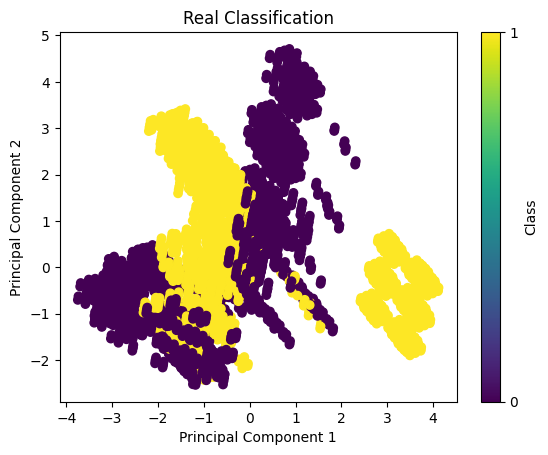

In [ ]:
# Plot real classification

scatter_true = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=label_encoder.transform(target))
plt.title('Real Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_true, ticks=np.unique(label_encoder.transform(target)), label='Class')

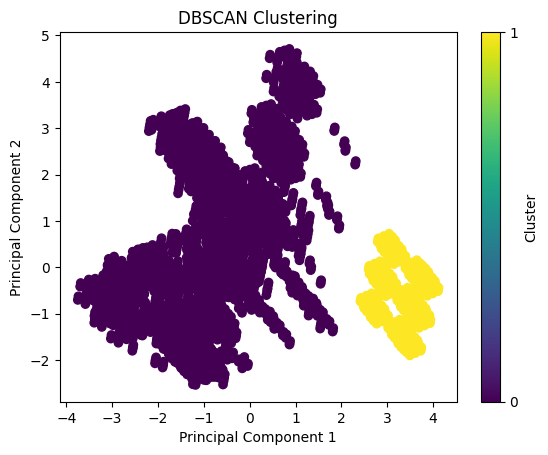

In [ ]:
scatter_dbscan = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels_dbscan)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_dbscan, ticks=np.unique(labels_dbscan), label='Cluster')


In [ ]:
import math
from scipy.spatial.distance import euclidean

class custom_DB():

    def __init__(self, eps = 0.6, minPts = 1):
        self.eps = eps
        self.minPts = minPts

    def train(self, X):
        self.X = X

        # list for storing visited points, noise and core points
        visited = []
        noise = []
        all_core = []
        for p in X:
            # storing points inside tuple like: (x,y) for easy understandability
            if ((p[0],p[1])) not in visited: # if it is not visited, it will not have any label
                visited.append((p[0],p[1]))
                neighbours = self.getNeighbours(X,p,visited) # find neighbours

                # if neighbour points count < minimum points, consider those points as noise
                if len(neighbours) < self.minPts:
                    noise = noise + neighbours
                    continue
                else:
                    # add all theneighbouring points and their neighbours to a new core
                    new_core = []
                    new_core.append((p[0],p[1]))
                    # since we already visted current point, p
                    neighbours.remove((p[0],p[1]))

                    # seedset containing neighbours and their neighbours
                    seedset = neighbours
                    while len(seedset) > 0:
                        q = seedset.pop(0) # like a queue, pop each element from begining, let's call it q (p is already referencing X)

                        # if q in noise, assign it to new core
                        if (q[0],q[1]) in noise:
                            noise.remove((q[0],q[1]))
                            new_core.append((q[0],q[1])) # adding q as border point

                        # if q is not noise and not visited
                        if (q[0],q[1]) not in visited:
                            visited.append((q[0],q[1])) # add it to visited list
                            new_core.append((q[0],q[1])) # its label is new core
                            neighbours = self.getNeighbours(X,q,visited)
                            if len(neighbours) >= self.minPts: # find neighbours of q
                                seedset = seedset + neighbours # add it to the seedset

                    # storing all cores
                    all_core.append(new_core)
        self.plot(all_core, noise)
        return all_core, noise

    def getNeighbours(self, X, p, visited):
        neighbours = []
        neighbours.append((p[0],p[1]))
        for q in X:
            if euclidean(p, q) < self.eps:
                neighbours.append((q[0],q[1]))
        return neighbours

    def plot(self, all_core, noise):
        for i,core in enumerate(all_core):
            X_p = []
            Y_p = []
            pt = []
            for x_p,y_p in core:
                X_p.append(x_p)
                Y_p.append(y_p)
                pt.append([x_p,y_p])
            plt.scatter(X_p,Y_p, label=i)
        plt.title("DBScan")
        plt.legend()
        plt.show()

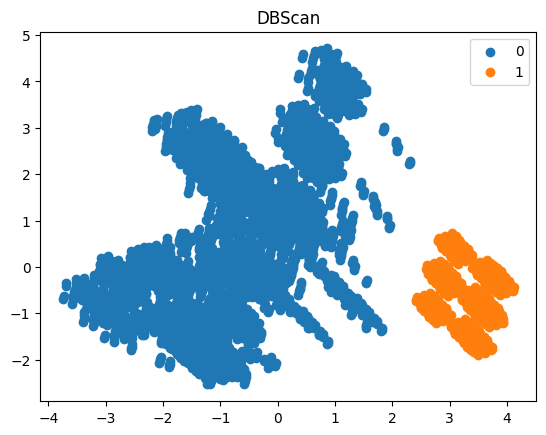

In [ ]:
db = custom_DB()
labels_db = db.train(pca_2d)